# Support Vector Machines - Ejercicio

En este ejercicio, utilizaremos máquinas de vectores soporte (SVM) para construir un clasificador de spam.  Empezaremos con SVM en algunos conjuntos de datos 2D sencillos para ver cómo funcionan.  A continuación, realizaremos un trabajo de preprocesamiento en un conjunto de correos electrónicos sin procesar y crearemos un clasificador en los correos electrónicos procesados utilizando una SVM para determinar si son spam o no.

Lo primero que vamos a hacer es examinar un simple conjunto de datos bidimensionales y ver cómo funciona una SVM lineal en el conjunto de datos para distintos valores de C (similar al término de regularización en la regresión lineal/logística).  Carguemos los datos.


## Ejercicio 1
SVM have the capability to perform linear as well as non-linear classification, regression and they are **effective for** **outlier detection**.<br> 
* SVMs are well suited for classification problems in which they are used to classify two classes which are also separable.
#### 1. Cargar bibliotecas

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 2. Cargar datos
Carga el fichero *ejer_1_data1.mat*. Busca la forma de cargar este tipo de ficheros. **scipy.io.loadmat**

loadmat get data from a .matfile so the data is now available for Python to use later.




In [6]:
from scipy.io import loadmat
df2 = loadmat('data/ejer_1_data1.mat')
df2

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:43 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[1.9643  , 4.5957  ],
        [2.2753  , 3.8589  ],
        [2.9781  , 4.5651  ],
        [2.932   , 3.5519  ],
        [3.5772  , 2.856   ],
        [4.015   , 3.1937  ],
        [3.3814  , 3.4291  ],
        [3.9113  , 4.1761  ],
        [2.7822  , 4.0431  ],
        [2.5518  , 4.6162  ],
        [3.3698  , 3.9101  ],
        [3.1048  , 3.0709  ],
        [1.9182  , 4.0534  ],
        [2.2638  , 4.3706  ],
        [2.6555  , 3.5008  ],
        [3.1855  , 4.2888  ],
        [3.6579  , 3.8692  ],
        [3.9113  , 3.4291  ],
        [3.6002  , 3.1221  ],
        [3.0357  , 3.3165  ],
        [1.5841  , 3.3575  ],
        [2.0103  , 3.2039  ],
        [1.9527  , 2.7843  ],
        [2.2753  , 2.7127  ],
        [2.3099  , 2.9584  ],
        [2.8283  , 2.6309  ],
        [3.0473  , 2.2931  ],
        [2.4827  , 2.0373  ],
        [2.5057 

#### 3. Crea un DataFrame con las features y el target

In [24]:
"""Creates a Pandas DataFrame from the input data dictionary.
The DataFrame contains: 
  'Feature1' and 'Feature2' column from 
the 'X' key in the data dict.
  'Target' column
from the 'y' key in the data dict.
"""
df = pd.DataFrame(df2['X'], columns=['Feature1', 'Feature2'])
df['Target'] = df2['y']    

df.head()

,Feature1,Feature2,Target
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1


#### 4. Traza un diagrama de dispersión/ scatterplot con los datos

In [16]:
import seaborn as sns

<AxesSubplot: xlabel='Feature1', ylabel='Feature2'>

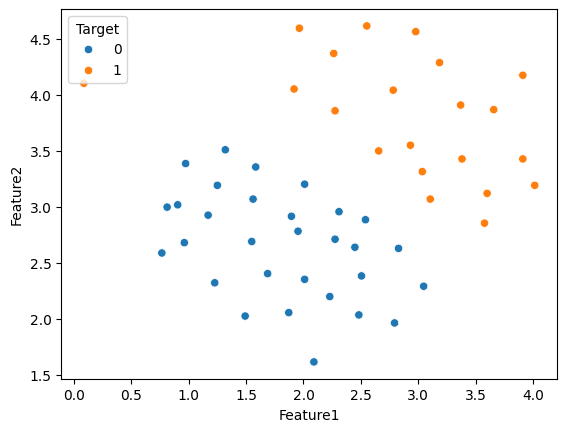

In [25]:
sns.scatterplot(x='Feature1', y='Feature2', hue='Target', data=df)

Observa que hay un outlier atípico que se sitúa aparte de los demás.  Las clases siguen siendo linealmente separables, pero el ajuste es muy estrecho.  Te recomiendo entrenar un SVM lineal para aprender el límite de clase.

#### 5. LinearSVC
Declarar un SVC Lineal con los hiperparamentados:

```Python
LinearSVC(C=1, loss='hinge', max_iter=10000)
```

In [20]:
from sklearn import svm

In [27]:
svc=svm.LinearSVC(C=1,loss='hinge',max_iter=10000)  
svc

LinearSVC(C=1, loss='hinge', max_iter=10000)

The code takes no explicit inputs. The three hyperparameters are:

* **C=1 -** The C parameter controls the penalty for misclassified examples. A higher C value leads to a higher penalty on errors and a more complex decision boundary.<br>

* **loss='hinge' -** This sets the loss function to 'hinge' which is standard for SVMs. The hinge loss penalizes examples that are on the wrong side of the decision boundary.<br>

* **max_iter=10000 -** This limits the maximum number of iterations for the solver to converge to 10,000. More iterations may lead to better convergence but also longer training time.

* The code directly outputs a LinearSVC model object which can then be used for training and prediction.<br>

* No data transformations or complex logic happens here. This just declares a LinearSVC model with some reasonable defaults that can be trained further **The model itself does not produce any outputs until it is fitted on data.**

 The resulting model object can then be used to fit training data and make predictions on new data.





#### 6. Prueba el rendimiento (puntuación)
Para el primer experimento usaremos C=1 y veremos cómo funciona.

In [30]:
"""
svc.fit:
 Fits a support vector classifier model. 
svc.score:
Scores the model to evaluate performance.

"""
svc.fit(df[['Feature1','Feature2']],df['Target'])
svc.score(df[['Feature1','Feature2']],df['Target']) 

0.9803921568627451

¿Ha clasificado correctamente outlier?

- The outlier seems missclassified, 
the SVM model parameters (like C or gamma for an RBF kernel) were not properly tuned, leading to poor generalization that could misclassify outliers.

Other possible reasons: 


- The features used may not provide enough signal to properly separate the outlier from the rest of the classes. Additional or better engineered features could help.

- The outlier could be mislabeled in the training data. If the true label of the outlier does not match what the model is trained on, it could lead to poor performance on that point. Data should be double checked.

So either the model needs better features to tell outliers apart, or we need to make sure the outlier example has the correct label. That way, the model can learn properly and know when something is an outlier or not in the future.

#### 7. Aumenta el valor de C hasta que obtengas un clasificador perfecto

Al aumentar el valor de C hemos creado un límite de decisión que ya no se ajusta naturalmente a los datos.  Podemos visualizar esto observando el nivel de confianza para cada predicción de clase, que es una función de la distancia del punto al hiperplano.

In [37]:
svc_500=svm.LinearSVC(C=500,loss='hinge',max_iter=10000)  
svc_500.fit(df[['Feature1','Feature2']],df['Target'])
svc_500.score(df[['Feature1','Feature2']],df['Target']) 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


1.0


* Turning up "C"  makes the model try harder to perfectly classify the training data, but we made the model too focused on memorizing the training data.

* So by turning C up too high, we made the model overfit and create a dividing line that is too complicated. We can tell this happened because now the model is less confident in its predictions on new data points. 

#### 8. Representar la función de decisión
Obtener la salida de `decision_function()` para el primer modelo. Trazar un gráfico de dispersión con X1, X2 y un rango de colores basado en `decision_function()`.

Text(0.5, 1.0, 'SVM Decision Boundary')

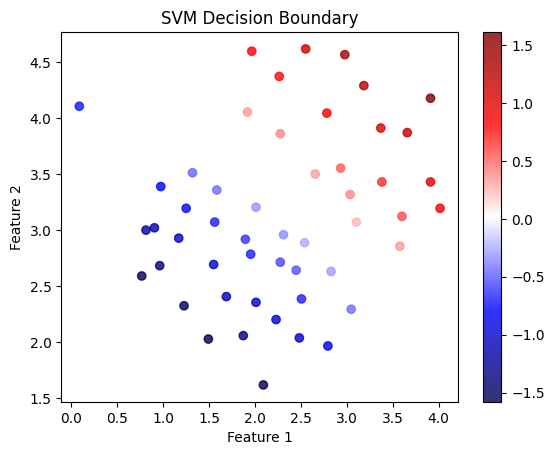

In [48]:
conf_level = svc.decision_function(df[['Feature1', 'Feature2']])

plt.scatter(df.Feature1,
            df.Feature2,
            alpha = .8,
            c = conf_level,
            cmap = 'seismic')
cbar = plt.colorbar()

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary')

* The decision boundary separates the two classes fairly well, with minimal overlap of points near the boundary. This indicates the SVM model has learned a good decision function for distinguishing the classes.

* The confidence levels show the model is more certain about the classification of points further from the decision boundary, as indicated by the darker/more saturated colors. Points near the boundary have lower confidence, with faded colors.

* The overall shape and angle of the decision boundary reflects how the SVM model is weighting the input features to define the separation of the classes. A nonlinear or angled boundary suggests the model has learned a complex relationship between the features.

* Any points with low confidence levels (faded colors) near the decision boundary indicate examples the SVM model finds hard to classify definitively. These could be candidates for further review or data cleaning.

* The spread of the points on each side of the boundary gives a sense of how overlapped or distinct the classes are in feature space. Well-separated compact clusters indicate more distinct classes.

* Any obvious misclassified points on the wrong side of the boundary highlight errors in the model. These points can be examined to understand why the model failed on them.

* The confidence color mapping makes it easy to visually inspect the certainty of predictions and quickly identify any potential issues with the model's ability to separate the classes. This facilitates debugging and iteration on the modeling process.



#### 9. Haz lo mismo con el segundo modelo

Text(0.5, 1.0, 'SVM Decision Boundary svc_500')

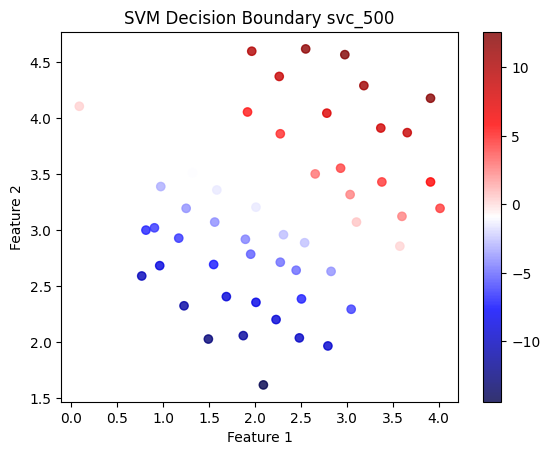

In [50]:
conf_level = svc_500.decision_function(df[['Feature1', 'Feature2']])

plt.scatter(df.Feature1,
            df.Feature2,
            alpha = .8,
            c = conf_level,
            cmap = 'seismic')
cbar = plt.colorbar()

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary svc_500')

Ahora vamos a pasar de un SVM lineal a uno que es capaz de clasificación no lineal utilizando kernels.  Primero tenemos la tarea de implementar una función de kernel gaussiano.  Aunque scikit-learn tiene un kernel gaussiano incorporado, por transparencia vamos a implementar uno desde cero.

## Ejercicio 2

A continuación vamos a examinar otro conjunto de datos, esta vez con un límite de decisión no lineal.

#### 1. Cargar `ejer_1_data2.mat`

In [52]:
Ex_2 = loadmat('data/ejer_1_data2.mat')
Ex_2

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:54 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0.107143 , 0.60307  ],
        [0.093318 , 0.649854 ],
        [0.0979263, 0.705409 ],
        ...,
        [0.975806 , 0.439474 ],
        [0.989631 , 0.425439 ],
        [0.996544 , 0.414912 ]]),
 'y': array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
       

#### 2. Crear un DataFrame con las features y el target

In [92]:
df2 = pd.DataFrame(Ex_2['X'], columns=['Feature1', 'Feature2'])
df2['Target'] = Ex_2['y']
df2.head()

,Feature1,Feature2,Target
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1


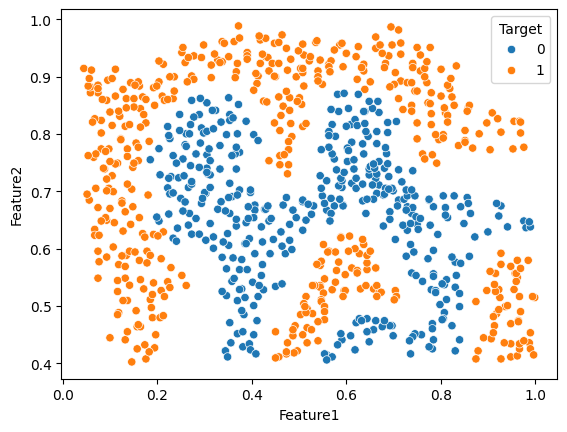

In [93]:
sns.scatterplot(data=df2,
                x="Feature1",
                y="Feature2",
                hue="Target");

* Each data point in the scatterplot would be colored based on the value in the 'Target' column for that row.

* Clustering of points with the same color, indicate correlations between those target values and the feature values.

* Outliers in the data would appear as points distant from the main clusters.

* The overall pattern and distribution of the points would give a sense of the relationships between the input features and the target variable.

For example, if points of a certain color tend to appear on a certain side of the graph, that could indicate that those target values correlate with those ranges of input features.



#### 3. Traza un diagrama de dispersión con los datos

Para este conjunto de datos construiremos un SVM utilizando un kernel de RBF incorporado y examinaremos su precisión en los datos de entrenamiento.  Para visualizar el límite de decisión, esta vez sombrearemos los puntos en función de la probabilidad prevista de que la instancia tenga una etiqueta de clase negativa.  Comprueba si el resultado acierta en la mayoría de los casos.

#### 4. Declarar un SVC con estos hiperparámetros
```Python
SVC(C=100, gamma=10, probability=True)
```


In [89]:
svc_100 = svm.SVC(C=100, gamma=10, probability=True)
svc_100

SVC(C=100, gamma=10, probability=True)

#### 5. Ajustar el clasificador y obtener el score

In [95]:
svc.fit(df2[['Feature1', 'Feature2']], df2['Target'])
svc.score(df2[['Feature1', 'Feature2']], df2['Target'])

0.5538818076477404

#### 6. Traza el diagrama de dispersión y la probabilidad de predecir 0 con un [color secuencial](https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html)

In [ ]:
prob = svc.predict_proba(df2[['Feature1', 'Feature2']])[:,0]

fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(df2.Feature1,
            df2.Feature2,
            alpha = .8,
            c = prob,
            cmap = 'winter')

cbar = plt.colorbar()